# Postwork 7

**Pruebas A/B y procesamiento de lenguaje natural**

*REQUISITO:* Tener un dataset limpio que contenga una columna con datos no estructurados. En caso de que tu dataset no contenga datos no estructurados, busca algún dataset apropiado.

Realiza los siguientes procedimientos:

- Utiliza patrones Regex para limpiar tus datos estructurados.
- Genera un objeto Text con la librería nltk y explora los contextos de las palabras que elegiste. Utiliza el método similar para obtener palabras que tengan contextos similares a las palabras originales. 
- Utiliza el objeto FreqDist de nltk para hacer análisis estadístico de tu dataset. Explora las palabras y los bigramas más comunes de tu dataset.
- Realiza visualizaciones de tus conteos de frecuencias utilizando gráficas de barras.
- Realiza visualizaciones de las distribuciones de frecuencias de las longitudes de las palabras o de las oraciones.
- Realiza nubes de palabras para detectar los temas más importantes de tu conjunto de datos.
- Haz un análisis de sentimientos de tu conjunto de datos, de preferencia utilizando una variable categórica para segmentar tus datos y poder comparar las distribuciones de polaridades entre cada segmento.

Para poder realizar el procesamiento de lenguaje natural, utilizaremos un conjunto de datos contiene reseñas y calificaciones de 5006 reseñas de películas de IMDb [1].

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Cargamos los datos:

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nproellochs/SentimentDictionaries/master/Dataset_IMDB.csv")
df.sample(5)

,Id,Text,Author,Rating
1142,6127,"Cast: Steven Seagal, Keenan Ivory Wayans, Bob ...",Berardinelli,0.35
1880,2110,"Starring: Suzy Amis, Bo Hopkins, Ian McKellen,...",Berardinelli,0.73
2615,17284,TRUE CRIME (Warner Bros.) Starring: Clint East...,Renshaw,0.50
972,23934,FATHER OF THE BRIDE (director: Vincente Minnel...,Schwartz,0.80
4113,27805,"In Ventura Pons's comedic drama, TO DIE (OR NO...",Rhodes,0.60


Podemos agrupar las reseñas por calificación:

In [ ]:
grouped_rating = df.groupby(['Rating'])['Text'].max()
grouped_rating

Rating
0.00    There's bad buzz, and then there's the the bad...
0.05    I didn't expect GHOST IN THE MACHINE to be thi...
0.09    United States, 1995 U.S. Availability: 9/29/95...
0.10    You'll check your watch frequently waiting for...
0.11    Starring: Terry "Hulk" Hogan, Sherman Hemsley,...
                              ...                        
0.95    West Germany, 1981 U.S. Re-release Date: begin...
0.96    United States, 1995 U.S. Availability: 12/15/9...
0.97    I don't usually do reviews of older movies, bu...
0.99    Date Released: 10/7/94 (NY, LA); 10/14/94 (els...
1.00    WAG THE DOG (New Line) Starring: Robert DeNiro...
Name: Text, Length: 87, dtype: object

Comenzaremos buscar palabras para definir patrones usando regex:

In [ ]:
grouped_rating[grouped_rating.str.contains('bad', case=False)]

Rating
0.00    There's bad buzz, and then there's the the bad...
0.05    I didn't expect GHOST IN THE MACHINE to be thi...
0.10    You'll check your watch frequently waiting for...
0.11    Starring: Terry "Hulk" Hogan, Sherman Hemsley,...
0.14    Cast: Wesley Snipes, Woody Harrelson, Jennifer...
0.16    Starring: Nicolas Cage, Jon Lovitz, Dana Carve...
0.17    Johnny (Ernie Reyes, Jr.) thinks he's just ano...
0.18    United States, 1995 U.S. Availability: general...
0.20    Will Smith, what were you thinking when you si...
0.22    Well, either CALENDAR GIRL is a blatant attemp...
0.26    United States, 1995 U.S. Availability: 10/13/9...
0.28    U.S. Availability: wide release on 3/3/95 Runn...
0.29    Much as I disliked ACE VENTURA: PET DETECTIVE,...
0.31    Starring: Robert Downey, Jr., Charles Grodin, ...
0.33    Starring: Patrick Swayze, Halle Berry, Sabrina...
0.34    Starring: Sylvester Stallone, Wesley Snipes, S...
0.38    Starring: Sinbad, Phil Hartman, Paul Ben-Victo...
0.43   

In [ ]:
grouped_rating[grouped_rating.str.contains('masterpiece', case=False)]

Rating
0.09    United States, 1995 U.S. Availability: 9/29/95...
0.18    United States, 1995 U.S. Availability: general...
0.34    Starring: Sylvester Stallone, Wesley Snipes, S...
0.44    Two twins, separated at birth, grow into adult...
0.53    Starring: Wesley Snipes, Michael Wright, There...
0.72    U.S. Availability: limited release 4/7/95 Runn...
0.89    United States, 1994 U.S. Availability: 8/95 (l...
Name: Text, dtype: object

In [ ]:
grouped_rating[grouped_rating.str.contains('Brad Pitt', case=False)]

Rating
0.73    United States, 1995 U.S. Availability: 9/22/95...
Name: Text, dtype: object

In [ ]:
grouped_rating[grouped_rating.str.contains('wom[ae]n|m[ae]n', case=False)]

Rating
0.00    There's bad buzz, and then there's the the bad...
0.05    I didn't expect GHOST IN THE MACHINE to be thi...
0.09    United States, 1995 U.S. Availability: 9/29/95...
0.10    You'll check your watch frequently waiting for...
0.11    Starring: Terry "Hulk" Hogan, Sherman Hemsley,...
                              ...                        
0.95    West Germany, 1981 U.S. Re-release Date: begin...
0.96    United States, 1995 U.S. Availability: 12/15/9...
0.97    I don't usually do reviews of older movies, bu...
0.99    Date Released: 10/7/94 (NY, LA); 10/14/94 (els...
1.00    WAG THE DOG (New Line) Starring: Robert DeNiro...
Name: Text, Length: 87, dtype: object

In [ ]:
grouped_rating.str.replace('\d','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Rating
0.00    There's bad buzz, and then there's the the bad...
0.05    I didn't expect GHOST IN THE MACHINE to be thi...
0.09    United States,  U.S. Availability: // (wide) R...
0.10    You'll check your watch frequently waiting for...
0.11    Starring: Terry "Hulk" Hogan, Sherman Hemsley,...
                              ...                        
0.95    West Germany,  U.S. Re-release Date: beginning...
0.96    United States,  U.S. Availability: // (NY, LA)...
0.97    I don't usually do reviews of older movies, bu...
0.99    Date Released: // (NY, LA); // (elsewhere) Run...
1.00    WAG THE DOG (New Line) Starring: Robert DeNiro...
Name: Text, Length: 87, dtype: object

Limpieza del conjunto de datos de signos y carácteres:

In [ ]:
grouped_rating = grouped_rating.str.replace("<br>|<br/>|br", '')
grouped_rating

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Rating
0.00    There's bad buzz, and then there's the the bad...
0.05    I didn't expect GHOST IN THE MACHINE to be thi...
0.09    United States, 1995 U.S. Availability: 9/29/95...
0.10    You'll check your watch frequently waiting for...
0.11    Starring: Terry "Hulk" Hogan, Sherman Hemsley,...
                              ...                        
0.95    West Germany, 1981 U.S. Re-release Date: begin...
0.96    United States, 1995 U.S. Availability: 12/15/9...
0.97    I don't usually do reviews of older movies, bu...
0.99    Date Released: 10/7/94 (NY, LA); 10/14/94 (els...
1.00    WAG THE DOG (New Line) Starring: Robert DeNiro...
Name: Text, Length: 87, dtype: object

In [ ]:
grouped_rating = grouped_rating.str.replace("[^\w\s]",'')
grouped_rating

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Rating
0.00    Theres bad buzz and then theres the the bad bu...
0.05    I didnt expect GHOST IN THE MACHINE to be this...
0.09    United States 1995 US Availability 92995 wide ...
0.10    Youll check your watch frequently waiting for ...
0.11    Starring Terry Hulk Hogan Sherman Hemsley Aust...
                              ...                        
0.95    West Germany 1981 US Rerelease Date beginning ...
0.96    United States 1995 US Availability 121595 NY L...
0.97    I dont usually do reviews of older movies but ...
0.99    Date Released 10794 NY LA 101494 elsewhere Run...
1.00    WAG THE DOG New Line Starring Robert DeNiro Du...
Name: Text, Length: 87, dtype: object

In [ ]:
grouped_rating = grouped_rating.str.lower()
grouped_rating

Rating
0.00    theres bad buzz and then theres the the bad bu...
0.05    i didnt expect ghost in the machine to be this...
0.09    united states 1995 us availability 92995 wide ...
0.10    youll check your watch frequently waiting for ...
0.11    starring terry hulk hogan sherman hemsley aust...
                              ...                        
0.95    west germany 1981 us rerelease date beginning ...
0.96    united states 1995 us availability 121595 ny l...
0.97    i dont usually do reviews of older movies but ...
0.99    date released 10794 ny la 101494 elsewhere run...
1.00    wag the dog new line starring robert deniro du...
Name: Text, Length: 87, dtype: object

Generamos un objeto Text con la librería nltk para explorar los contextos de las palabras *good* y *bad*.

In [ ]:
# Separamos cada oración en palabras

tokenized = grouped_rating.apply(nltk.word_tokenize)
tokenized

Rating
0.00    [theres, bad, buzz, and, then, theres, the, th...
0.05    [i, didnt, expect, ghost, in, the, machine, to...
0.09    [united, states, 1995, us, availability, 92995...
0.10    [youll, check, your, watch, frequently, waitin...
0.11    [starring, terry, hulk, hogan, sherman, hemsle...
                              ...                        
0.95    [west, germany, 1981, us, rerelease, date, beg...
0.96    [united, states, 1995, us, availability, 12159...
0.97    [i, dont, usually, do, reviews, of, older, mov...
0.99    [date, released, 10794, ny, la, 101494, elsewh...
1.00    [wag, the, dog, new, line, starring, robert, d...
Name: Text, Length: 87, dtype: object

In [ ]:
# Creamos un objeto Text 

all_words = tokenized.sum()
text = nltk.Text(all_words)
text

<Text: theres bad buzz and then theres the the...>

In [ ]:
# Buscamos coincidencias de las palabras 'good' y 'bad'.

print("Coincidencias good:")
print(text.concordance('good', lines=10))
print("\n")
print("Coincidencias bad:")
print(text.concordance('bad', lines=10))

Coincidencias good:
Displaying 10 of 68 matches:
 the film is that it undoubtedly has good intentions but regardless of the fil
s up the monotony although it sounds good one suspects that they could have pl
takenly believe that this would be a good way to spend an afternoon offer them
nce of tommy lee jones of course the good guy was played by steven segal the m
last ten minutes if theres something good to be said about the middle portion 
waste of film im not talking about a good idea gone awry im referring to somet
rings to be precise however unlike a good mystery where disparate plot element
 play just about any kind of rolebad good guys and good bad guysisnt much of a
ut any kind of rolebad good guys and good bad guysisnt much of a standout eith
ill put an end to these pictures for good once upon a time john travolta and k
None


Coincidencias bad:
Displaying 10 of 38 matches:
theres bad buzz and then theres the the bad buzz
eres bad buzz and then theres the the bad buzz which surr

In [ ]:
# Buscamos las palabras que tengan contextos similares a las palabras 'good' y 'bad'.
print("Palabras similares a 'good':")
print(text.similar('girl'))
print("\n")
print("Palabras similares a 'bad':")
print(text.similar('boy'))

Palabras similares a 'good':
world one point plot character first director story game best result
editing city beginning resolution streets joy focus crew face
None


Palabras similares a 'bad':
moment it release possibility study long movie man job room game
turkey masterpiece documentary while nanny chair scene chance failure
None


In [ ]:
# Buscamos los contextos que tengan en común las palabras 'good' y 'bad'.
text.common_contexts(['good', 'bad'])

as_as the_guy the_guys


In [ ]:
print('Total de palabras:', len(text))

Total de palabras: 60529


In [ ]:
print('Total de palabras distintas:', len(set(text)))

Total de palabras distintas: 10254


In [ ]:
# Cuantificamos la riqueza léxica del conjunto de datos
(len(set(text)) / len(text)) * 100

16.940640023790248

In [ ]:
# Buscamos colocaciones (secuencia de 2 palabras que usualmente aparecieron juntas)
text.collocations()

mpaa classification; running length; motion picture; aspect ratio;
united states; das boot; theatrical aspect; mature themes; star trek;
ratio 1851; states 1995; pink panther; 1851 cast; special effects;
wesley snipes; quentin tarantino; chasing amy; las vegas; alfred
molina; sandra bullock


Ahora realizaremos el análisis estadístico del dataset usando el objeto FreqDist de nltk:

In [ ]:
# Cargamos los stopwords
from nltk.corpus import stopwords
english_stop_words = stopwords.words('english')

In [ ]:
# Obtenenemos la frecuencia de palabras tokenizadas sin stopwords
all_words_except_stop_words = [word for word in text if word not in english_stop_words]
freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

freq_dist_no_stop_words.most_common(30)

[('film', 267),
 ('one', 227),
 ('movie', 190),
 ('like', 129),
 ('time', 111),
 ('director', 109),
 ('story', 104),
 ('us', 104),
 ('two', 103),
 ('theres', 98),
 ('much', 98),
 ('even', 96),
 ('little', 96),
 ('first', 85),
 ('man', 79),
 ('however', 77),
 ('films', 74),
 ('picture', 72),
 ('best', 72),
 ('get', 71),
 ('isnt', 70),
 ('screenplay', 69),
 ('music', 69),
 ('good', 68),
 ('character', 67),
 ('something', 66),
 ('doesnt', 66),
 ('way', 65),
 ('characters', 65),
 ('life', 62)]

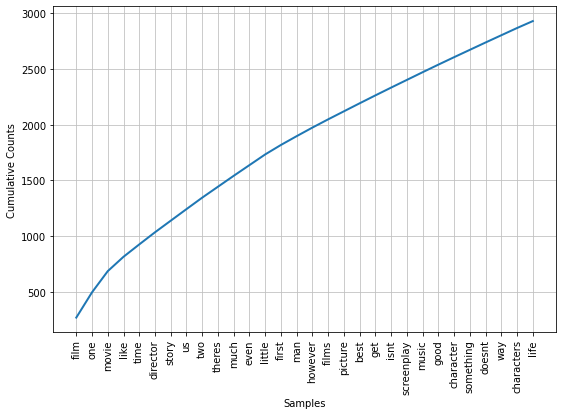

In [ ]:
# Proporción del text está siendo ocupada por las palabras más comunes
plt.figure(figsize=(9,6))
freq_dist_no_stop_words.plot(30, cumulative=True);

In [ ]:
# Obtenemos las palabras más comunes para visualizar su frecuencia mediante gráficos
dict_common_monograms = {}

for element in freq_dist_no_stop_words.most_common(20):
    dict_common_monograms[element[0]] = element[1]

series_freq_most_common = pd.Series(dict_common_monograms)
series_freq_most_common

film        267
one         227
movie       190
like        129
time        111
director    109
story       104
us          104
two         103
theres       98
much         98
even         96
little       96
first        85
man          79
however      77
films        74
picture      72
best         72
get          71
dtype: int64

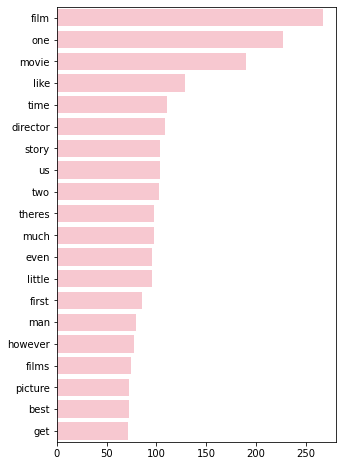

In [ ]:
fig, ax = plt.subplots(figsize = (5,8))
sns.barplot(y = series_freq_most_common.index,
            x = series_freq_most_common,
            color = 'pink');

In [ ]:
# Visualizamos la frecuencia de los bigramas más comunes

freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('of', 'the'): 439, ('in', 'the'): 235, ('on', 'the'): 121, ('is', 'a'): 116, ('and', 'the'): 116, ('to', 'be'): 108, ('in', 'a'): 100, ('to', 'the'): 95, ('the', 'film'): 93, ('for', 'the'): 92, ...})

In [ ]:
# Ahora sin palabras vacías

text = nltk.Text(all_words_except_stop_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('running', 'length'): 43, ('mpaa', 'classification'): 41, ('motion', 'picture'): 39, ('us', 'availability'): 32, ('us', 'distributor'): 30, ('united', 'states'): 29, ('classification', 'r'): 28, ('theatrical', 'aspect'): 27, ('aspect', 'ratio'): 27, ('das', 'boot'): 25, ...})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


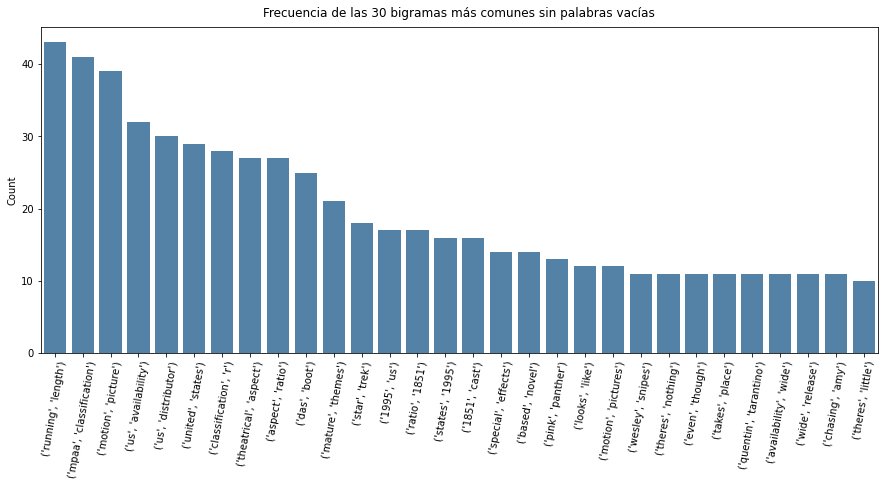

In [ ]:
most_common_30 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(30))))

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot()

sns.barplot(most_common_30[:, 0], most_common_30[:, 1], ax=ax,  color = 'steelblue');
ax.set_title('Frecuencia de las 30 bigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

En esta parte haremos visualizaciones de las distribuciones de frecuencias de acuerdo con las longitudes de las palabras:

In [ ]:
# Lista de las palabras que tienen 5 o más carácteres y que aparecen 10 veces en el dataset.
unique = set(all_words_except_stop_words)
unique_series = pd.Series(list(unique))

larger_than_5 = unique_series.str.len() >= 5
is_frequent = unique_series.apply(lambda x: freq_dist_no_stop_words[x] == 10)

unique_series[larger_than_5 & is_frequent]

409         review
737        equally
849          front
879         appear
941     particular
           ...    
9196      mariachi
9302      strachey
9548        clerks
9655       serious
9889      jonathan
Length: 61, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


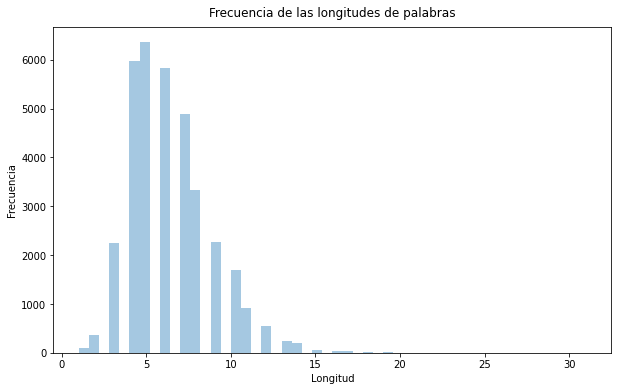

In [ ]:
# Histograma para visualizar la frecuencia de longitudes de palabras

word_lengths = [len(w) for w in all_words_except_stop_words]

fig = plt.figure(figsize=(10, 6))
ax = sns.distplot(word_lengths, kde=False, norm_hist=False);
ax.set_title('Frecuencia de las longitudes de palabras', pad=10)
ax.set_xlabel('Longitud')
ax.set_ylabel('Frecuencia');

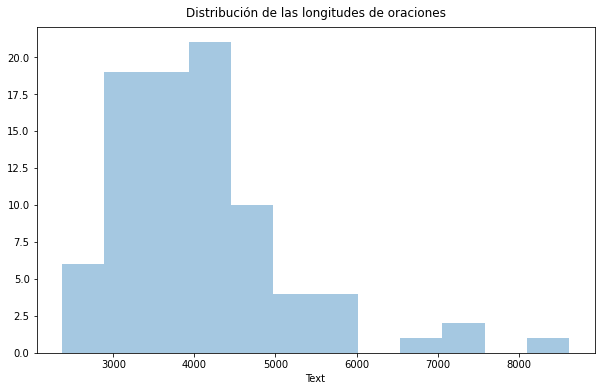

In [ ]:
# Histograma para visualizar la distribución de longitudes de oraciones

sentence_lengths = grouped_rating.apply(lambda x: len(x))

fig = plt.figure(figsize=(10, 6))
ax=sns.distplot(sentence_lengths, kde=False, norm_hist=False);
ax.set_title('Distribución de las longitudes de oraciones', pad=10);

Por último, construiremos una nube de palabras utilizando la librería wordcloud:

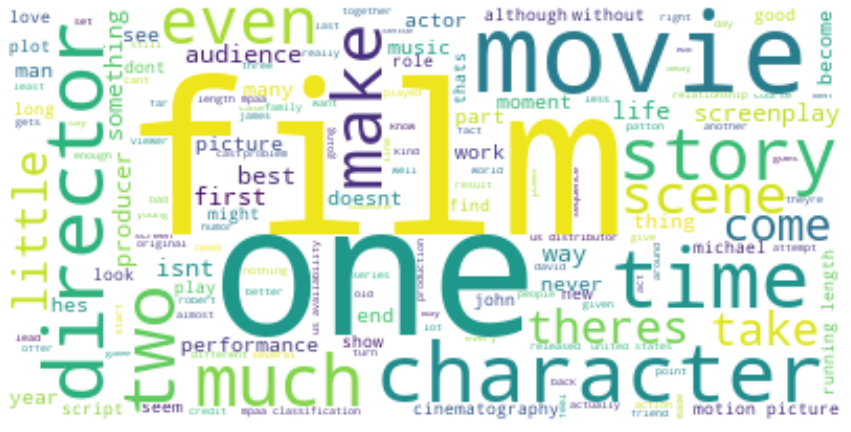

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Referencias

La base de datos fue recuperada de https://github.com/nproellochs/SentimentDictionaries el 27 de octubre de 2022